# David vs Goliath | Narrow AI vs General AI

![DvsG](https://textandcanon.org/wp-content/uploads/2022/03/img_featured_goliath.jpg)


In this notebook we are going to compare a General AI with a Narrow AI. The former will be a Large Language Model granted with vision capabilities. This means in can process both images and text!

There will be two options:
- using a **local** model from Huggingface 🤗. This means that will run on the hardware granted in google colab. The library use is [llama-cpp-python](https://github.com/abetlen/llama-cpp-python/tree/f3fb90b114835cc50c4816787d56bac2fe1180c3) 🦙. Remember to select a GPU in the Runtime to make the generation faster.
- a model called through API. More specifically ```gpt-4o-mini``` from OpenAI ⚛. You will need a to have an ```OPENAI_API_KEY```. See [here](https://platform.openai.com/docs/api-reference/introduction) for more information.


<img src="https://miro.medium.com/v2/resize:fit:1086/format:webp/0*MEVPMeuNCPp2xuGF" alt="VLLM" width="400" height="300">



In [ ]:
# Run this cell only if you want to test a local model!
# Take a thee.. it will take some time (30 mins approx)

!git clone --recurse-submodules https://github.com/abetlen/llama-cpp-python.git
%cd llama-cpp-python
!CMAKE_ARGS="-DGGML_CUDA=on" FORCE_CMAKE=1 python3 -m pip install --verbose -e .


## A Practica Case
The task to solve is finding the best approximation of the linear relationships between a custer of data.

In medical researchers linear regression is often used to understand the relationship between drug dosage and blood pressure of patients (see [link](https://journals.sagepub.com/doi/pdf/10.1177/0310057X0303100506)).

For example, researchers might administer various dosages of a certain drug to patients and observe how their blood pressure responds. They might fit a simple linear regression model using dosage as the predictor variable and blood pressure as the response variable.

Hence, let's compare two models, two kinds of AI, narrow and general, study their behavious on this task and select the best option based on the resource used and outcomes.

As Narrow AI we will use a simple linear model. One of the simples ML models, adapted to the data through **least-squares fitting**. Least-squares fitting is a mathematical method used to find the best-fitting line (or curve) to a set of data points. It minimizes the sum of the squares of the differences (the residuals) between the observed data and the values predicted by the line.
<img src="https://www.jmp.com/en_ca/statistics-knowledge-portal/what-is-regression/the-method-of-least-squares/_jcr_content/par/styledcontainer_2069/par/lightbox_4392/lightboxImage.img.png/1548351202284.png" alt="Regression" width="600" height="300">

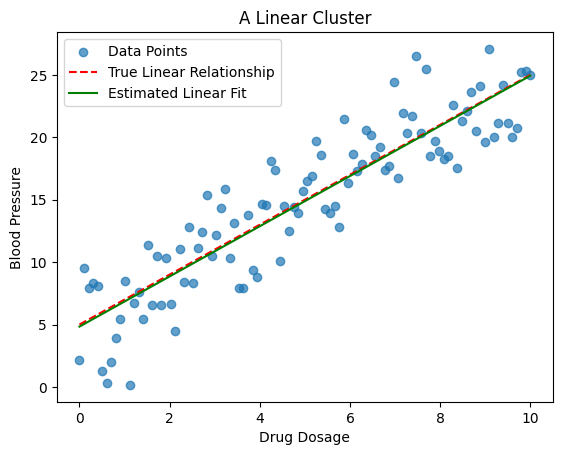


True slope (m): 2
True intercept (b): 5

Estimated slope (m_e): 2.0093895368646453
Estimated intercept (b_e): 4.835517135584463


In [ ]:
# Here we create a synthetic dataset and use it to train a linear regression model
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the linear relationship
m = 2  # Slope
b = 5  # Intercept
num_points = 100  # Number of data points
x = np.linspace(0, 10, num_points)
noise = np.random.normal(0, 3, num_points)
y = m * x + b + noise

# Perform linear regression using numpy
A = np.vstack([x, np.ones(len(x))]).T
coeffs, residuals, rank, s = np.linalg.lstsq(A, y, rcond=None)  # Perform least-squares fitting
m_e, b_e = coeffs

# Plot the generated data
plt.scatter(x, y, label='Data Points', alpha=0.7)

# Save the plot as an image (we'll use it later for the LLM)
output_path = "./linear_relationship_plot.png"
plt.savefig(output_path)
plt.close()

# Plot the estimated regression
plt.scatter(x, y, label='Data Points', alpha=0.7)
plt.plot(x, m * x + b, color='red', label='True Linear Relationship', linestyle='--')
plt.plot(x, m_e * x + b_e, color='green', label='Estimated Linear Fit', linestyle='-')
plt.title('A Linear Cluster')
plt.xlabel('Drug Dosage')
plt.ylabel('Blood Pressure')
plt.legend()
plt.show()

print(f'\nTrue slope (m): {m}')
print(f'True intercept (b): {b}')
print(f'\nEstimated slope (m_e): {m_e}')
print(f'Estimated intercept (b_e): {b_e}')


# Local Model

In [ ]:
from llama_cpp import Llama
from llama_cpp.llama_chat_format import MoondreamChatHandler
from IPython.display import clear_output

chat_handler = MoondreamChatHandler.from_pretrained(
  repo_id="vikhyatk/moondream2",
  filename="*mmproj*",
)

llm = Llama.from_pretrained(
  repo_id="vikhyatk/moondream2",
  filename="*text-model*",
  chat_handler=chat_handler,
  n_ctx=2048,
  n_gpu_layers=25,
  verbose = False
)


 The image features a long wooden boardwalk that stretches across a lush green field. The boardwalk is surrounded by tall grass, creating a serene and peaceful atmosphere. The sky above is a beautiful blue, dotted with fluffy white clouds. The scene is captured from a high vantage point, providing a comprehensive view of the boardwalk and the surrounding landscape.


llama_perf_context_print:        load time =      28.04 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   745 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /    70 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =    1303.14 ms /   815 tokens


{'id': 'chatcmpl-73b7c572-3fa3-499f-960f-afeac5add429', 'model': '/root/.cache/huggingface/hub/models--vikhyatk--moondream2/snapshots/d1bbc503ec2ed10e8b3d6cc5c317b99232f2ab14/./moondream2-text-model-f16.gguf', 'created': 1733218426, 'object': 'chat.completion.chunk', 'choices': [{'index': 0, 'delta': {}, 'logprobs': None, 'finish_reason': 'stop'}]}


In [ ]:
import base64

# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = "./linear_relationship_plot.png"

# Getting the base64 string
base64_image = encode_image(image_path)

image_description = (
    'This image shows a scatterplot illustrating the relationship between "Drug '
    'Dosage" (x-axis) and "Blood Pressure" (y-axis). The datapoints share a linear '
    'relationship. Estimate the values of the inetercept and slope of the line.'
    'Include onbly the values in the answer.'
)

response = llm.create_chat_completion(
    messages = [
        {
            "role": "user",
            "content": [
                {"type" : "text", "text": image_description},
                {"type": "image_url", "image_url": {"url": f"data:image/png;base64,{base64_image}"} }

            ]
        }
    ],
    stream=True,
)

output = ''
for tk in response:
    if 'content' in tk['choices'][0]['delta']:
        output+=tk['choices'][0]['delta']['content']
        print(output)
        clear_output(wait=True)

print('\n', output)

llama_perf_context_print:        load time =      28.04 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   810 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /    89 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =    1584.49 ms /   899 tokens



  The scatter plot in the image shows a relationship between the drug "Drug" and the dosage "Dosage". The x-axis represents the drug, while the y-axis represents the dosage. The points on the scatter plot are scattered across the graph, indicating that there is no linear relationship between the two variables. The slope of the line connecting the points is 0, suggesting that there is no direct relationship between the drug and the dosage.


# API Model

In [ ]:
import os
import base64

from openai import OpenAI
from google.colab import userdata

client = OpenAI(api_key=userdata.get('OPENAI_API_KEY'))

# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Getting the base64 string
base64_image = encode_image("./linear_relationship_plot.png")

image_description = (
    'This image shows a scatterplot illustrating the relationship between "Drug '
    'Dosage" (x-axis) and "Blood Pressure" (y-axis). The datapoints share a linear '
    'relationship. Estimate the values of the inetercept and slope of the line.'
    'Include onbly the values in the answer.'
)


response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": image_description},
        {"type": "image_url", "image_url": {
            "url":  f"data:image/png;base64,{base64_image}"
          },
        },
      ],
    }
  ],
)

print(response.choices[0].message.content)

Intercept: 5  
Slope: 2.5
